# Import Library


In [7]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import kendalltau
# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.preprocessing import MinMaxScaler



# Modeling
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,f1_score, accuracy_score, precision_score, recall_score,make_scorer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Model Saving
import pickle
import warnings

warnings.filterwarnings('ignore')




# Data Loading

In [8]:
drive.mount('/content/gdrive')

#Call the existing data set
df = pd.read_csv('/content/gdrive/My Drive/Data_latih/loan_data_2007_2014.csv')

df

Mounted at /content/gdrive


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

Based on this info, some column will be droped. Columns that will be droped are :
- Id: too many distinct columns
- member id: This column simply displays the row index.
- desc: This column's missing value must be dropped because it is excessive.
- mths_since_last_delinq: This column's missing value must be dropped because it is excessive.
- The mths_since_last_record variable This column's missing value must be dropped because it is excessive.
- next_pymnt_d: This column's missing value must be dropped because it is excessive.
- mths_since_last_major_derog : This column's missing value must be dropped because it is excessive.
- annual_inc_joint: This column's missing value must be dropped because it is excessive.
- dti_joint : This column's missing value must be dropped because it is excessive.
- verification_status_joint : This column's missing value must be dropped because it is excessive.
- tot_coll_amt : This column's missing value must be dropped because it is excessive.
- tot_cur_bal : This column's missing value must be dropped because it is excessive.
- open_acc_6m : This column's missing value must be dropped because it is excessive.
- open_il_6m : This column's missing value must be dropped because it is excessive.
- open_il_12m : This column's missing value must be dropped because it is excessive.
- open_il_24m : This column's missing value must be dropped because it is excessive.
- mths_since_rcnt_il : This column's missing value must be dropped because it is excessive.
- total_bal_il : This column's missing value must be dropped because it is excessive.
- il_util : This column's missing value must be dropped because it is excessive.
- open_rv_12m : This column's missing value must be dropped because it is excessive.
- open_rv_24m : This column's missing value must be dropped because it is excessive.
- max_bal_bc : This column's missing value must be dropped because it is excessive.
- all_util : This column's missing value must be dropped because it is excessive.
- total_rev_hi_lim : This column's missing value must be dropped because it is excessive.
- inq_fi : This column's missing value must be dropped because it is excessive.
- total_cu_tl : This column's missing value must be dropped because it is excessive.
- inq_last_12m : This column's missing value must be dropped because it is excessive.


In [10]:
droped_column= ['Unnamed: 0','id', 'member_id' ,'desc', 'mths_since_last_delinq', 'mths_since_last_record',  'next_pymnt_d', 'mths_since_last_major_derog',
'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl',  'inq_last_12m' ]


In [11]:
df = df.drop(droped_column, axis=1)
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,0.00,0.00,0.00,Jan-15,171.62,Jan-16,0.0,1,INDIVIDUAL,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,0.00,0.00,0.00,Jun-14,649.91,Jan-16,0.0,1,INDIVIDUAL,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,16.97,0.00,0.00,Jan-15,357.48,Jan-15,0.0,1,INDIVIDUAL,0.0
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,...,0.00,0.00,0.00,Jan-16,67.79,Jan-16,0.0,1,INDIVIDUAL,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,...,0.00,0.00,0.00,Jan-16,432.64,Jan-16,0.0,1,INDIVIDUAL,0.0
466281,22000,22000,22000.0,60 months,19.97,582.50,D,D5,Chief of Interpretation (Park Ranger),10+ years,...,0.00,0.00,0.00,Dec-14,17.50,Jan-16,0.0,1,INDIVIDUAL,0.0
466282,20700,20700,20700.0,60 months,16.99,514.34,D,D1,patrol,7 years,...,0.00,0.00,0.00,Jan-16,514.34,Dec-15,0.0,1,INDIVIDUAL,0.0
466283,2000,2000,2000.0,36 months,7.90,62.59,A,A4,Server Engineer Lead,3 years,...,0.00,0.00,0.00,Dec-14,1500.68,Apr-15,0.0,1,INDIVIDUAL,0.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 47 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   funded_amnt                 466285 non-null  int64  
 2   funded_amnt_inv             466285 non-null  float64
 3   term                        466285 non-null  object 
 4   int_rate                    466285 non-null  float64
 5   installment                 466285 non-null  float64
 6   grade                       466285 non-null  object 
 7   sub_grade                   466285 non-null  object 
 8   emp_title                   438697 non-null  object 
 9   emp_length                  445277 non-null  object 
 10  home_ownership              466285 non-null  object 
 11  annual_inc                  466281 non-null  float64
 12  verification_status         466285 non-null  object 
 13  issue_d       

There will be some missing values dropped, but not their columns. This is possible as the total amount of missing values in those columns is manageable and may be disregarded.

In [13]:
df_fix = df.dropna()
df_fix = df_fix.reset_index(drop=True)
df_fix

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq
0,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0
1,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,16.97,0.00,0.00,Jan-15,357.48,Jan-15,0.0,1,INDIVIDUAL,0.0
2,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,...,0.00,0.00,0.00,Jan-16,67.79,Jan-16,0.0,1,INDIVIDUAL,0.0
3,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,0.00,0.00,0.00,Jan-15,161.03,Sep-15,0.0,1,INDIVIDUAL,0.0
4,7000,7000,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,...,0.00,0.00,0.00,Jan-16,170.08,Jan-16,0.0,1,INDIVIDUAL,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437705,15000,15000,15000.0,36 months,13.53,509.25,B,B5,Director of Operations,4 years,...,0.00,0.00,0.00,Jan-16,509.25,Jan-16,0.0,1,INDIVIDUAL,0.0
437706,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,...,0.00,0.00,0.00,Jan-16,432.64,Jan-16,0.0,1,INDIVIDUAL,0.0
437707,22000,22000,22000.0,60 months,19.97,582.50,D,D5,Chief of Interpretation (Park Ranger),10+ years,...,0.00,0.00,0.00,Dec-14,17.50,Jan-16,0.0,1,INDIVIDUAL,0.0
437708,20700,20700,20700.0,60 months,16.99,514.34,D,D1,patrol,7 years,...,0.00,0.00,0.00,Jan-16,514.34,Dec-15,0.0,1,INDIVIDUAL,0.0


In [14]:
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437710 entries, 0 to 437709
Data columns (total 47 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   437710 non-null  int64  
 1   funded_amnt                 437710 non-null  int64  
 2   funded_amnt_inv             437710 non-null  float64
 3   term                        437710 non-null  object 
 4   int_rate                    437710 non-null  float64
 5   installment                 437710 non-null  float64
 6   grade                       437710 non-null  object 
 7   sub_grade                   437710 non-null  object 
 8   emp_title                   437710 non-null  object 
 9   emp_length                  437710 non-null  object 
 10  home_ownership              437710 non-null  object 
 11  annual_inc                  437710 non-null  float64
 12  verification_status         437710 non-null  object 
 13  issue_d       

In [15]:
df_fix.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq'],
      dtype='object')

In [16]:
columns = [ 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq']

In [17]:
cardinal = []
for i in columns:
    nunique = df[i].nunique()
    type = df[i].dtypes
    print(i, nunique,type)

    if type == 'object' and nunique > 10 or nunique ==1 :
        cardinal.append(i)



cardinal

loan_amnt 1352 int64
funded_amnt 1354 int64
funded_amnt_inv 9854 float64
term 2 object
int_rate 506 float64
installment 55622 float64
grade 7 object
sub_grade 35 object
emp_title 205475 object
emp_length 11 object
home_ownership 6 object
annual_inc 31901 float64
verification_status 3 object
issue_d 91 object
loan_status 9 object
pymnt_plan 2 object
url 466285 object
purpose 14 object
title 63099 object
zip_code 888 object
addr_state 50 object
dti 3997 float64
delinq_2yrs 24 float64
earliest_cr_line 664 object
inq_last_6mths 28 float64
open_acc 62 float64
pub_rec 26 float64
revol_bal 58142 int64
revol_util 1269 float64
total_acc 112 float64
initial_list_status 2 object
out_prncp 135665 float64
out_prncp_inv 141189 float64
total_pymnt 351609 float64
total_pymnt_inv 347659 float64
total_rec_prncp 172713 float64
total_rec_int 270249 float64
total_rec_late_fee 5808 float64
recoveries 22773 float64
collection_recovery_fee 20275 float64
last_pymnt_d 98 object
last_pymnt_amnt 198194 float64
la

['sub_grade',
 'emp_title',
 'emp_length',
 'issue_d',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'last_pymnt_d',
 'last_credit_pull_d',
 'policy_code',
 'application_type']

Based on cardinality checking, some column will be dropped causes by its cardinality. The columns that will be droped are :
- 'sub_grade'
- 'emp_title'
- 'emp_length'
- 'issue_d'
- 'url'
- 'purpose'
- 'title'
- 'zip_code'
- 'addr_state'
- 'earliest_cr_line'
- 'last_pymnt_d'
- 'last_credit_pull_d'
- 'application_type'

In [18]:
df_final = df_fix.drop(cardinal, axis=1)
df_final = df_final.reset_index(drop=True)
df_final

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq
0,2500,2500,2500.0,60 months,15.27,59.83,C,RENT,30000.0,Source Verified,...,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,0.0
1,10000,10000,10000.0,36 months,13.49,339.31,C,RENT,49200.0,Source Verified,...,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,0.0
2,3000,3000,3000.0,60 months,12.69,67.79,B,RENT,80000.0,Source Verified,...,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,0.0
3,5000,5000,5000.0,36 months,7.90,156.46,A,RENT,36000.0,Source Verified,...,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,161.03,0.0,0.0
4,7000,7000,7000.0,60 months,15.96,170.08,C,RENT,47004.0,Not Verified,...,8136.840000,8136.84,5110.85,3025.99,0.00,0.00,0.00,170.08,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437705,15000,15000,15000.0,36 months,13.53,509.25,B,RENT,66000.0,Source Verified,...,12222.000000,12222.00,9314.37,2907.63,0.00,0.00,0.00,509.25,0.0,0.0
437706,18400,18400,18400.0,60 months,14.47,432.64,C,MORTGAGE,110000.0,Source Verified,...,10383.360000,10383.36,5826.00,4557.36,0.00,0.00,0.00,432.64,0.0,0.0
437707,22000,22000,22000.0,60 months,19.97,582.50,D,MORTGAGE,78000.0,Verified,...,4677.920000,4677.92,1837.04,2840.88,0.00,0.00,0.00,17.50,0.0,0.0
437708,20700,20700,20700.0,60 months,16.99,514.34,D,MORTGAGE,46000.0,Verified,...,12343.980000,12343.98,6271.69,6072.29,0.00,0.00,0.00,514.34,0.0,0.0


In [19]:
df_final['loan_status'].unique()

array(['Charged Off', 'Fully Paid', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [20]:
def loan_status_risk(loan_status):
    if pd.isna(loan_status):
        pass
    elif loan_status in ['Fully Paid']:
        return 'Low Risk'
    elif loan_status in ['Current','In Grace Period']:
        return 'Medium Risk'
    else :
        return 'High Risk'

In [21]:
df_final['loan_risk'] = df_final['loan_status'].apply(loan_status_risk)
df_final['loan_risk']

0           High Risk
1            Low Risk
2         Medium Risk
3            Low Risk
4         Medium Risk
             ...     
437705    Medium Risk
437706    Medium Risk
437707      High Risk
437708    Medium Risk
437709       Low Risk
Name: loan_risk, Length: 437710, dtype: object

In [22]:
df_final = df_final.drop(['loan_status'],axis=1)
df_final

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,loan_risk
0,2500,2500,2500.0,60 months,15.27,59.83,C,RENT,30000.0,Source Verified,...,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,0.0,High Risk
1,10000,10000,10000.0,36 months,13.49,339.31,C,RENT,49200.0,Source Verified,...,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,0.0,Low Risk
2,3000,3000,3000.0,60 months,12.69,67.79,B,RENT,80000.0,Source Verified,...,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,0.0,Medium Risk
3,5000,5000,5000.0,36 months,7.90,156.46,A,RENT,36000.0,Source Verified,...,5631.38,5000.00,631.38,0.00,0.00,0.00,161.03,0.0,0.0,Low Risk
4,7000,7000,7000.0,60 months,15.96,170.08,C,RENT,47004.0,Not Verified,...,8136.84,5110.85,3025.99,0.00,0.00,0.00,170.08,0.0,0.0,Medium Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437705,15000,15000,15000.0,36 months,13.53,509.25,B,RENT,66000.0,Source Verified,...,12222.00,9314.37,2907.63,0.00,0.00,0.00,509.25,0.0,0.0,Medium Risk
437706,18400,18400,18400.0,60 months,14.47,432.64,C,MORTGAGE,110000.0,Source Verified,...,10383.36,5826.00,4557.36,0.00,0.00,0.00,432.64,0.0,0.0,Medium Risk
437707,22000,22000,22000.0,60 months,19.97,582.50,D,MORTGAGE,78000.0,Verified,...,4677.92,1837.04,2840.88,0.00,0.00,0.00,17.50,0.0,0.0,High Risk
437708,20700,20700,20700.0,60 months,16.99,514.34,D,MORTGAGE,46000.0,Verified,...,12343.98,6271.69,6072.29,0.00,0.00,0.00,514.34,0.0,0.0,Medium Risk


In [23]:
df_final.to_csv('data_final.csv', index=False)

# EDA

In [24]:
df_final.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'home_ownership', 'annual_inc',
       'verification_status', 'pymnt_plan', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'loan_risk'],
      dtype='object')

In [25]:
final_columns =['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'home_ownership', 'annual_inc',
       'verification_status', 'pymnt_plan', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'loan_risk']

In [26]:
col_num = []
col_cat = []

for i in final_columns:
    if df_final[i].dtypes == 'object':
        col_cat.append(i)

    else:
        col_num.append(i)

print('numerical columns are: ',col_num )
print('categorical columns are: ',col_cat)

numerical columns are:  ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq']
categorical columns are:  ['term', 'grade', 'home_ownership', 'verification_status', 'pymnt_plan', 'initial_list_status', 'loan_risk']


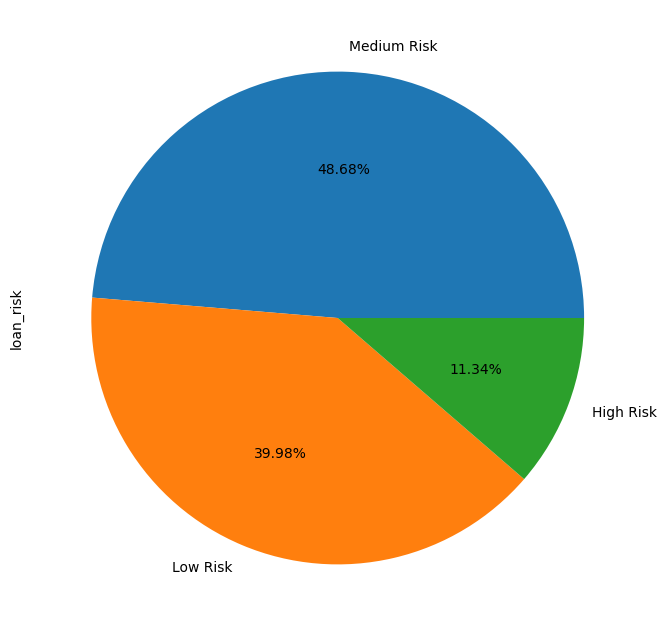

In [27]:
fig,ax1 = plt.subplots(figsize=(8,8))

df_final['loan_risk'].value_counts().plot(kind='pie', autopct='%.2f%%',ax=ax1)
plt.show()

# Feature Engineering

In [28]:
correlation_num = []
for i in col_num:
    correlation, p_value = kendalltau(df_final['loan_risk'], df_final[i])


    if p_value <0.05 :
        correlation_num.append(i)
print('The column that has correlation with loan status are', correlation_num)

The column that has correlation with loan status are ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq']


In [29]:
correlation_cat = []
for i in col_cat :
    tabel_korelasi = pd.crosstab(df_final['loan_risk'], df_final[i])
    tes_korelasi = stats.chi2_contingency(tabel_korelasi)
    pval = tes_korelasi.pvalue
    corr = tes_korelasi.statistic

    if i == 'loan_risk':
        pass

    elif pval < 0.05 :
        correlation_cat.append(i)
        print(i,'pvalue ;',pval,'correlation :',corr)

print('')
print('The column that has correlation with loan status are ', correlation_cat)




term pvalue ; 0.0 correlation : 13117.757881775491
grade pvalue ; 0.0 correlation : 16716.13953698683
home_ownership pvalue ; 0.0 correlation : 1479.6933294831176
verification_status pvalue ; 0.0 correlation : 5321.874414113254
pymnt_plan pvalue ; 0.0001571853008553622 correlation : 17.516170376700547
initial_list_status pvalue ; 0.0 correlation : 18095.23471306946

The column that has correlation with loan status are  ['term', 'grade', 'home_ownership', 'verification_status', 'pymnt_plan', 'initial_list_status']


In [30]:
print('Total numerical columns that will be used on this case is ', len(correlation_num))
print('Total categorical columns that will be used on this case is ', len(correlation_cat))

Total numerical columns that will be used on this case is  26
Total categorical columns that will be used on this case is  6


In [31]:
# Data fixed after feature
data_final = pd.concat([df_final[correlation_num],df_final[correlation_cat],df_final['loan_risk']],axis=1)
data_final

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,term,grade,home_ownership,verification_status,pymnt_plan,initial_list_status,loan_risk
0,2500,2500,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,3.0,...,119.66,0.0,0.0,60 months,C,RENT,Source Verified,n,f,High Risk
1,10000,10000,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,10.0,...,357.48,0.0,0.0,36 months,C,RENT,Source Verified,n,f,Low Risk
2,3000,3000,3000.0,12.69,67.79,80000.0,17.94,0.0,0.0,15.0,...,67.79,0.0,0.0,60 months,B,RENT,Source Verified,n,f,Medium Risk
3,5000,5000,5000.0,7.90,156.46,36000.0,11.20,0.0,3.0,9.0,...,161.03,0.0,0.0,36 months,A,RENT,Source Verified,n,f,Low Risk
4,7000,7000,7000.0,15.96,170.08,47004.0,23.51,0.0,1.0,7.0,...,170.08,0.0,0.0,60 months,C,RENT,Not Verified,n,f,Medium Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437705,15000,15000,15000.0,13.53,509.25,66000.0,16.22,0.0,0.0,8.0,...,509.25,0.0,0.0,36 months,B,RENT,Source Verified,n,w,Medium Risk
437706,18400,18400,18400.0,14.47,432.64,110000.0,19.85,0.0,2.0,18.0,...,432.64,0.0,0.0,60 months,C,MORTGAGE,Source Verified,n,w,Medium Risk
437707,22000,22000,22000.0,19.97,582.50,78000.0,18.45,0.0,5.0,18.0,...,17.50,0.0,0.0,60 months,D,MORTGAGE,Verified,n,f,High Risk
437708,20700,20700,20700.0,16.99,514.34,46000.0,25.65,0.0,2.0,18.0,...,514.34,0.0,0.0,60 months,D,MORTGAGE,Verified,n,f,Medium Risk


# Data Preparation

## Spliting

In [32]:
# Separating targets from features

x = data_final.drop('loan_risk',axis=1)
y = data_final['loan_risk']

In [33]:
# Divide data into train data and test data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 12,stratify=y)

In [34]:
x_train_num = x_train[correlation_num]
x_train_cat = x_train[correlation_cat]

x_test_num = x_test[correlation_num]
x_test_cat = x_test[correlation_cat]

## Numerical Column Check

In [35]:
# Check the normality of the train data using skewness
for i in correlation_num :
    skew = x_train_num[i].skew()

    print('Skewness of', i ,'is', skew )


Skewness of loan_amnt is 0.7175247479377633
Skewness of funded_amnt is 0.7214589873727791
Skewness of funded_amnt_inv is 0.7171439036043684
Skewness of int_rate is 0.3365513802867208
Skewness of installment is 0.9382649665491353
Skewness of annual_inc is 33.764922247200936
Skewness of dti is 0.19049457494596922
Skewness of delinq_2yrs is 5.23576917162253
Skewness of inq_last_6mths is 2.1028432820282545
Skewness of open_acc is 1.1635514972375216
Skewness of pub_rec is 18.12881352628148
Skewness of revol_bal is 20.418879836223343
Skewness of revol_util is -0.1384496735774074
Skewness of total_acc is 0.8124586929751729
Skewness of out_prncp is 1.5675274182114
Skewness of out_prncp_inv is 1.567843718745667
Skewness of total_pymnt is 1.398469197234613
Skewness of total_pymnt_inv is 1.3969839301785456
Skewness of total_rec_prncp is 1.4350676047257196
Skewness of total_rec_int is 2.2619536134466656
Skewness of total_rec_late_fee is 14.199676745307361
Skewness of recoveries is 13.3986974223823

In [36]:
# Cek kenormalan data test menggunakan skewness
for i in correlation_num :
    skew = x_test_num[i].skew()

    print('Skewness of', i ,'is', skew )


Skewness of loan_amnt is 0.723731836539392
Skewness of funded_amnt is 0.7274108658414649
Skewness of funded_amnt_inv is 0.7224682353819475
Skewness of int_rate is 0.33890609091411034
Skewness of installment is 0.9429816194258724
Skewness of annual_inc is 14.883049655976503
Skewness of dti is 0.18503721599402204
Skewness of delinq_2yrs is 5.819727309023993
Skewness of inq_last_6mths is 2.062250808003835
Skewness of open_acc is 1.1779917402746916
Skewness of pub_rec is 5.688287190098693
Skewness of revol_bal is 13.44877165193115
Skewness of revol_util is -0.23645107890517827
Skewness of total_acc is 0.8101324452782522
Skewness of out_prncp is 1.575428961244194
Skewness of out_prncp_inv is 1.5757440166692271
Skewness of total_pymnt is 1.389103674682627
Skewness of total_pymnt_inv is 1.3874460694225015
Skewness of total_rec_prncp is 1.431819364003705
Skewness of total_rec_int is 2.2095034530959254
Skewness of total_rec_late_fee is 12.316571078729977
Skewness of recoveries is 12.13457750036

In [37]:
# determining outlier data in train data
for i in correlation_num:
    skew = x_train_num[i].skew()

    q1 = x_train_num[i].quantile(0.25)
    q3 = x_train_num[i].quantile(0.75)
    iqr = q3-q1

    upper_boundary = q3 + (1.5*iqr)
    lower_boundary = q1 - (1.5*iqr)

    outlier = x_train_num[(x_train_num[i]>upper_boundary)|((x_train_num[i]<lower_boundary))]
    persen_outlier = len(outlier)/len(x_train_num)*100

    print('Precentage outlier of', i ,'is', persen_outlier, '%')






Precentage outlier of loan_amnt is 0.0 %
Precentage outlier of funded_amnt is 0.0 %
Precentage outlier of funded_amnt_inv is 0.0 %
Precentage outlier of int_rate is 1.047211624134701 %
Precentage outlier of installment is 2.478810171117863 %
Precentage outlier of annual_inc is 4.140583948276256 %
Precentage outlier of dti is 0.02684425761348838 %
Precentage outlier of delinq_2yrs is 17.994791071714147 %
Precentage outlier of inq_last_6mths is 7.892497315574238 %
Precentage outlier of open_acc is 2.313175390098467 %
Precentage outlier of pub_rec is 12.705044435813667 %
Precentage outlier of revol_bal is 4.887939503324119 %
Precentage outlier of revol_util is 0.004283658129811976 %
Precentage outlier of total_acc is 1.8888076580384272 %
Precentage outlier of out_prncp is 4.758858605012451 %
Precentage outlier of out_prncp_inv is 4.767997075689383 %
Precentage outlier of total_pymnt is 4.042059811290581 %
Precentage outlier of total_pymnt_inv is 4.07033195494734 %
Precentage outlier of to

In [38]:
# determining outlier data in test data
for i in correlation_num:
    skew = x_test_num[i].skew()

    q1 = x_test_num[i].quantile(0.25)
    q3 = x_test_num[i].quantile(0.75)
    iqr = q3-q1

    upper_boundary = q3 + (1.5*iqr)
    lower_boundary = q1 - (1.5*iqr)

    outlier = x_test_num[(x_test_num[i]>upper_boundary)|((x_test_num[i]<lower_boundary))]
    persen_outlier = len(outlier)/len(x_test_num)*100

    print('Precentage outlier of', i ,'is', persen_outlier, '%')






Precentage outlier of loan_amnt is 0.0 %
Precentage outlier of funded_amnt is 0.0 %
Precentage outlier of funded_amnt_inv is 0.0 %
Precentage outlier of int_rate is 1.1011857165703318 %
Precentage outlier of installment is 2.4548216855909164 %
Precentage outlier of annual_inc is 3.9443924059308673 %
Precentage outlier of dti is 0.029700029700029697 %
Precentage outlier of delinq_2yrs is 18.048479586941124 %
Precentage outlier of inq_last_6mths is 7.785977016746247 %
Precentage outlier of open_acc is 2.253775330698408 %
Precentage outlier of pub_rec is 12.464874003335542 %
Precentage outlier of revol_bal is 4.913070297685683 %
Precentage outlier of revol_util is 0.003426926503849581 %
Precentage outlier of total_acc is 1.8642480180941718 %
Precentage outlier of out_prncp is 4.812547120239428 %
Precentage outlier of out_prncp_inv is 4.812547120239428 %
Precentage outlier of total_pymnt is 3.947819332434717 %
Precentage outlier of total_pymnt_inv is 3.967238582623198 %
Precentage outlier 

In [39]:
x_train_num.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
int_rate                      0
installment                   0
annual_inc                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
acc_now_delinq                0
dtype: int64

In [40]:
x_test_num.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
int_rate                      0
installment                   0
annual_inc                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
acc_now_delinq                0
dtype: int64

## Categorical Column Check

In [41]:
x_train_cat.isnull().sum()

term                   0
grade                  0
home_ownership         0
verification_status    0
pymnt_plan             0
initial_list_status    0
dtype: int64

In [42]:
x_test_cat.isnull().sum()

term                   0
grade                  0
home_ownership         0
verification_status    0
pymnt_plan             0
initial_list_status    0
dtype: int64

# Labelling

In [43]:
for i in correlation_cat :
    print(i,data_final[i].unique())

term [' 60 months' ' 36 months']
grade ['C' 'B' 'A' 'E' 'D' 'F' 'G']
home_ownership ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
verification_status ['Source Verified' 'Not Verified' 'Verified']
pymnt_plan ['n' 'y']
initial_list_status ['f' 'w']


In [44]:
correlation_cat

['term',
 'grade',
 'home_ownership',
 'verification_status',
 'pymnt_plan',
 'initial_list_status']

In [45]:
correlation_cat_ordinal = ['term','grade','pymnt_plan','initial_list_status']
correlation_cat_non_ordinal = ['verification_status','pymnt_plan']

# Pipeline

In [46]:
num_pipeline = Pipeline([
    ('Scaler', MinMaxScaler()),

])

num_tr = num_pipeline.fit_transform(x_train[correlation_num])
num_tr

array([[0.33333333, 0.33333333, 0.34142857, ..., 0.01099838, 0.        ,
        0.        ],
       [0.42028986, 0.42028986, 0.42857143, ..., 0.0143485 , 0.        ,
        0.        ],
       [0.56521739, 0.56521739, 0.57      , ..., 0.30221828, 0.        ,
        0.        ],
       ...,
       [0.24637681, 0.24637681, 0.25714286, ..., 0.01027558, 0.        ,
        0.        ],
       [0.33333333, 0.33333333, 0.34285714, ..., 0.13197831, 0.        ,
        0.        ],
       [0.33333333, 0.33333333, 0.34285714, ..., 0.01147886, 0.        ,
        0.        ]])

In [47]:
for i in correlation_cat_ordinal:
    unique = data_final[i].unique()
    print(i,unique)

term [' 60 months' ' 36 months']
grade ['C' 'B' 'A' 'E' 'D' 'F' 'G']
pymnt_plan ['n' 'y']
initial_list_status ['f' 'w']


In [48]:
cat_pipeline = Pipeline([

    ('Encoder',OrdinalEncoder(categories=[
                            [' 36 months',' 60 months' ],
                            ['A','B','C','D','E','F','G' ],
                            ['n','y'],
                            ['f' ,'w']
                        ]))
])

cat_tr = cat_pipeline.fit_transform(x_train[correlation_cat_ordinal])
cat_tr

array([[0., 1., 0., 0.],
       [0., 2., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 3., 0., 0.],
       [0., 2., 0., 0.]])

In [49]:
cat_pipeline2 = Pipeline([
    ('Encoder',OneHotEncoder(sparse=False))
])

cat_tr2 = cat_pipeline2.fit_transform(x_train[correlation_cat_non_ordinal])
cat_tr2

array([[0., 1., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [0., 0., 1., 1., 0.],
       ...,
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0.]])

In [50]:
prep = ColumnTransformer([
    ('num',num_pipeline,correlation_num),
    ('cat_ordinal',cat_pipeline,correlation_cat_ordinal),
    ('cat_non_ordinal',cat_pipeline2,correlation_cat_non_ordinal),

])

prep


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('Scaler', MinMaxScaler())]),
                                 ['loan_amnt', 'funded_amnt', 'funded_amnt_inv',
                                  'int_rate', 'installment', 'annual_inc',
                                  'dti', 'delinq_2yrs', 'inq_last_6mths',
                                  'open_acc', 'pub_rec', 'revol_bal',
                                  'revol_util', 'total_acc', 'out_prncp',
                                  'out_prncp_inv', 'total_pymnt',
                                  'total_pymnt_inv', 'total_rec_prncp',
                                  'total_rec_...
                                  'acc_now_delinq']),
                                ('cat_ordinal',
                                 Pipeline(steps=[('Encoder',
                                                  OrdinalEncoder(categories=[[' '
                                                                              '36 '
                                                                              'months',
                                                                              ' '
                                                                              '60 '
                                                                              'months'],
                                                                             ['A',
                                                                              'B',
                                                                              'C',
                                                                              'D',
                                                                              'E',
                                                                              'F',
                                                                              'G'],
                                                                             ['n',
                                                                              'y'],
                                                                             ['f',
                                                                              'w']]))]),
                                 ['term', 'grade', 'pymnt_plan',
                                  'initial_list_status']),
                                ('cat_non_ordinal',
                                 Pipeline(steps=[('Encoder',
                                                  OneHotEncoder(sparse=False,
                                                                sparse_output=False))]),
                                 ['verification_status', 'pymnt_plan'])])

In [51]:
x_train_new = prep.fit_transform(x_train)
x_train_new = pd.DataFrame(x_train_new)
x_train_new

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.333333,0.333333,0.341429,0.318314,0.274945,0.006896,0.526382,0.041667,0.00000,0.168675,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.420290,0.420290,0.428571,0.463663,0.362122,0.006896,0.482371,0.000000,0.09375,0.132530,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.565217,0.565217,0.570000,0.120155,0.438174,0.012099,0.179795,0.000000,0.00000,0.036145,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.130435,0.130435,0.142857,0.269864,0.106287,0.010231,0.755939,0.000000,0.00000,0.108434,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,0.194203,0.194203,0.205714,0.302810,0.159674,0.008230,0.356339,0.000000,0.00000,0.060241,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350163,0.101449,0.101449,0.114286,0.526647,0.090157,0.012699,0.306577,0.000000,0.03125,0.108434,...,0.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
350164,0.449275,0.449275,0.457143,0.229651,0.360377,0.015567,0.080020,0.000000,0.03125,0.072289,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
350165,0.246377,0.246377,0.257143,0.017926,0.184767,0.005681,0.237309,0.000000,0.03125,0.084337,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
350166,0.333333,0.333333,0.342857,0.574128,0.297158,0.003161,0.316829,0.000000,0.00000,0.072289,...,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [52]:
x_test_new = prep.transform(x_test)
x_test_new = pd.DataFrame(x_test_new)
x_test_new

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.318841,0.318841,0.328571,0.302810,0.261760,0.008897,0.546637,0.0,0.1250,0.084337,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.773913,0.773913,0.777143,0.335756,0.640823,0.010231,0.267817,0.0,0.0625,0.060241,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.358696,0.358696,0.367857,0.560562,0.218491,0.003828,0.742936,0.0,0.0625,0.084337,...,0.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.492754,0.492754,0.500000,0.384205,0.414324,0.020369,0.409602,0.0,0.0625,0.216867,...,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.275362,0.275362,0.274286,0.318314,0.227245,0.007430,0.234559,0.0,0.0000,0.072289,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87537,0.049275,0.049275,0.062857,0.660368,0.046702,0.008897,0.282821,0.0,0.0000,0.084337,...,0.0,0.0,3.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
87538,0.217391,0.217391,0.228571,0.414729,0.185054,0.003962,0.288322,0.0,0.0000,0.036145,...,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
87539,0.194203,0.194203,0.205714,0.598353,0.175086,0.004895,0.439110,0.0,0.0000,0.132530,...,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
87540,0.275362,0.275362,0.285714,0.366764,0.230692,0.008230,0.332333,0.0,0.0000,0.048193,...,0.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


# Modelling

In [53]:
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=12)
rf = RandomForestClassifier(random_state=12)
ada_boost = AdaBoostClassifier(random_state=12)

## KNN

In [54]:
x_train_knn = np.ascontiguousarray(x_train_new)
x_test_knn = np.ascontiguousarray(x_test_new)

In [55]:
knn.fit(x_train_knn,y_train)

KNeighborsClassifier()

In [56]:
y_train_predict_knn = knn.predict(x_train_knn)
y_test_predict_knn = knn.predict(x_test_knn)


In [57]:
print('------Clasification Report KNN Train-------')
print(classification_report(y_train,y_train_predict_knn))

print('')
print('------Clasification Report KNN Test-------')
print(classification_report(y_test,y_test_predict_knn))


------Clasification Report KNN Train-------
              precision    recall  f1-score   support

   High Risk       0.98      0.77      0.86     39716
    Low Risk       0.96      0.99      0.97    139995
 Medium Risk       0.95      0.98      0.97    170457

    accuracy                           0.96    350168
   macro avg       0.96      0.91      0.93    350168
weighted avg       0.96      0.96      0.96    350168


------Clasification Report KNN Test-------
              precision    recall  f1-score   support

   High Risk       0.96      0.72      0.83      9929
    Low Risk       0.94      0.98      0.96     34999
 Medium Risk       0.94      0.96      0.95     42614

    accuracy                           0.94     87542
   macro avg       0.95      0.89      0.91     87542
weighted avg       0.95      0.94      0.94     87542



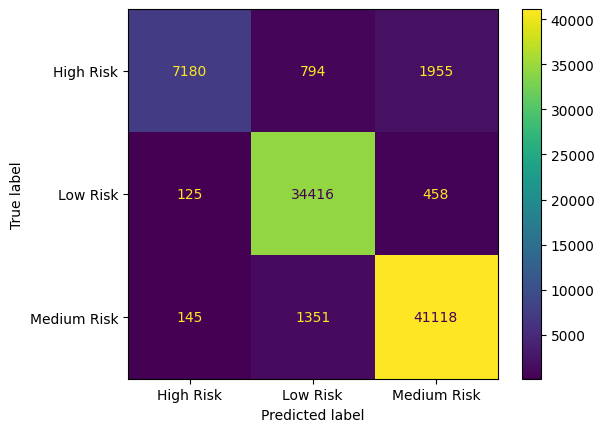

In [58]:
ConfusionMatrixDisplay.from_estimator( knn, x_test_knn, y_test)

## Decision Tree

In [59]:
dt.fit(x_train_new,y_train)

DecisionTreeClassifier(random_state=12)

In [60]:
y_train_predict_dt = dt.predict(x_train_new)
y_test_predict_dt = dt.predict(x_test_new)


In [61]:
print('------Clasification Report Decision Tree Train-------')
print(classification_report(y_train,y_train_predict_dt))

print('')
print('------Clasification Report Decision Tree Test-------')
print(classification_report(y_test,y_test_predict_dt))


------Clasification Report Decision Tree Train-------
              precision    recall  f1-score   support

   High Risk       1.00      1.00      1.00     39716
    Low Risk       1.00      1.00      1.00    139995
 Medium Risk       1.00      1.00      1.00    170457

    accuracy                           1.00    350168
   macro avg       1.00      1.00      1.00    350168
weighted avg       1.00      1.00      1.00    350168


------Clasification Report Decision Tree Test-------
              precision    recall  f1-score   support

   High Risk       0.83      0.85      0.84      9929
    Low Risk       0.99      0.99      0.99     34999
 Medium Risk       0.97      0.96      0.97     42614

    accuracy                           0.96     87542
   macro avg       0.93      0.94      0.93     87542
weighted avg       0.96      0.96      0.96     87542



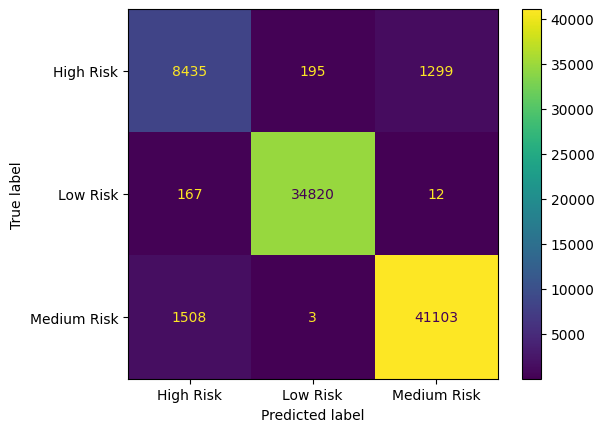

In [62]:
ConfusionMatrixDisplay.from_estimator( dt, x_test_new, y_test)

## Random Forest

In [63]:
rf.fit(x_train_new,y_train)

RandomForestClassifier(random_state=12)

In [64]:
y_train_predict_rf = rf.predict(x_train_new)
y_test_predict_rf = rf.predict(x_test_new)


In [65]:
print('------Clasification Report Random Forest Train-------')
print(classification_report(y_train,y_train_predict_rf))

print('')
print('------Clasification Report Random Forest Test-------')
print(classification_report(y_test,y_test_predict_rf))


------Clasification Report Random Forest Train-------
              precision    recall  f1-score   support

   High Risk       1.00      1.00      1.00     39716
    Low Risk       1.00      1.00      1.00    139995
 Medium Risk       1.00      1.00      1.00    170457

    accuracy                           1.00    350168
   macro avg       1.00      1.00      1.00    350168
weighted avg       1.00      1.00      1.00    350168


------Clasification Report Random Forest Test-------
              precision    recall  f1-score   support

   High Risk       0.99      0.82      0.90      9929
    Low Risk       0.99      1.00      1.00     34999
 Medium Risk       0.97      1.00      0.98     42614

    accuracy                           0.98     87542
   macro avg       0.98      0.94      0.96     87542
weighted avg       0.98      0.98      0.98     87542



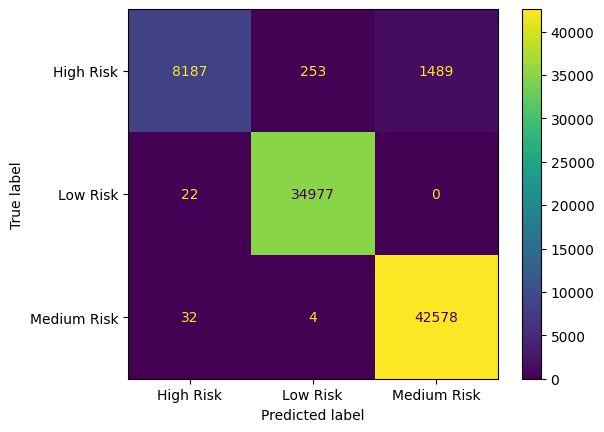

In [66]:
ConfusionMatrixDisplay.from_estimator( rf, x_test_new, y_test)

## Ada Boost

In [67]:
ada_boost.fit(x_train_new,y_train)

AdaBoostClassifier(random_state=12)

In [68]:
y_train_predict_ada_boost = ada_boost.predict(x_train_new)
y_test_predict_ada_boost = ada_boost.predict(x_test_new)


In [69]:
print('------Clasification Report Ada Boost Train-------')
print(classification_report(y_train,y_train_predict_ada_boost))

print('')
print('------Clasification Report Ada Boost Test-------')
print(classification_report(y_test,y_test_predict_ada_boost))


------Clasification Report Ada Boost Train-------
              precision    recall  f1-score   support

   High Risk       0.48      0.79      0.60     39716
    Low Risk       0.98      0.99      0.98    139995
 Medium Risk       0.97      0.81      0.88    170457

    accuracy                           0.88    350168
   macro avg       0.81      0.86      0.82    350168
weighted avg       0.92      0.88      0.89    350168


------Clasification Report Ada Boost Test-------
              precision    recall  f1-score   support

   High Risk       0.48      0.78      0.60      9929
    Low Risk       0.97      0.99      0.98     34999
 Medium Risk       0.97      0.81      0.88     42614

    accuracy                           0.88     87542
   macro avg       0.81      0.86      0.82     87542
weighted avg       0.91      0.88      0.89     87542



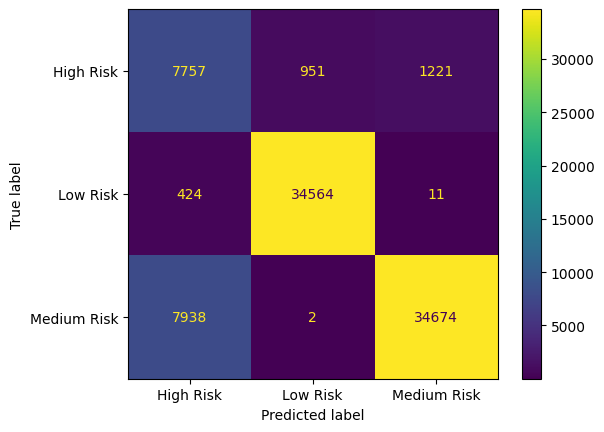

In [70]:
ConfusionMatrixDisplay.from_estimator( ada_boost, x_test_new, y_test)

# Cross Validation

In [71]:
def cross_val (model):

    accuracy_train_cross_val = cross_val_score(model,
                                        x_train_new,
                                        y_train,
                                        cv=5,
                                        scoring="accuracy")

    print('----Cross Validation',model,'---- ')
    print('accuracy Score - All - Cross Validation  : ', accuracy_train_cross_val)
    print('accuracy Score - Mean - Cross Validation : ', accuracy_train_cross_val.mean())
    print('accuracy Score - Std - Cross Validation  : ', accuracy_train_cross_val.std())
    print('accuracy Score - Range of Test-Set       : ', (accuracy_train_cross_val.mean()-accuracy_train_cross_val.std()) , '-', (accuracy_train_cross_val.mean()+accuracy_train_cross_val.std()))

In [72]:
cross_val(knn)

----Cross Validation KNeighborsClassifier() ---- 
accuracy Score - All - Cross Validation  :  [0.94338464 0.94332753 0.94362738 0.94255565 0.94448332]
accuracy Score - Mean - Cross Validation :  0.943475703341141
accuracy Score - Std - Cross Validation  :  0.0006188747507856415
accuracy Score - Range of Test-Set       :  0.9428568285903554 - 0.9440945780919265


In [73]:
cross_val(dt)

----Cross Validation DecisionTreeClassifier(random_state=12) ---- 
accuracy Score - All - Cross Validation  :  [0.96398892 0.96303224 0.96343205 0.9634458  0.96391701]
accuracy Score - Mean - Cross Validation :  0.9635632046229393
accuracy Score - Std - Cross Validation  :  0.0003519428688289565
accuracy Score - Range of Test-Set       :  0.9632112617541103 - 0.9639151474917683


In [74]:
cross_val(rf)

----Cross Validation RandomForestClassifier(random_state=12) ---- 
accuracy Score - All - Cross Validation  :  [0.97970986 0.98039524 0.97896736 0.97970957 0.98082333]
accuracy Score - Mean - Cross Validation :  0.9799210684321663
accuracy Score - Std - Cross Validation  :  0.0006384060123323704
accuracy Score - Range of Test-Set       :  0.979282662419834 - 0.9805594744444986


In [75]:
cross_val(ada_boost)

----Cross Validation AdaBoostClassifier(random_state=12) ---- 
accuracy Score - All - Cross Validation  :  [0.69686152 0.9008196  0.84965874 0.70985107 0.65990319]
accuracy Score - Mean - Cross Validation :  0.7634188244402969
accuracy Score - Std - Cross Validation  :  0.0941606728578551
accuracy Score - Range of Test-Set       :  0.6692581515824417 - 0.857579497298152


# Hyperparameter Tuning

In [76]:
param = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [77]:
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=12)


In [78]:
random_search.fit(x_train_new, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=12),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=12, scoring='accuracy')

In [79]:
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}


In [80]:
best_model = random_search.best_estimator_
accuracy = best_model.score(x_test_new, y_test)
print(f"Best Model Accuracy: {accuracy:.2f}")

Best Model Accuracy: 0.98


In [81]:
y_train_predict_best_rf = best_model.predict(x_train_new)
y_test_predict_best_rf = best_model.predict(x_test_new)


In [82]:
print('------Clasification Report Random Forest Best Train-------')
print(classification_report(y_train,y_train_predict_best_rf))

print('')
print('------Clasification Report Random Forest Best Test-------')
print(classification_report(y_test,y_test_predict_best_rf))


------Clasification Report Random Forest Best Train-------
              precision    recall  f1-score   support

   High Risk       1.00      0.95      0.97     39716
    Low Risk       1.00      1.00      1.00    139995
 Medium Risk       0.99      1.00      0.99    170457

    accuracy                           0.99    350168
   macro avg       1.00      0.98      0.99    350168
weighted avg       0.99      0.99      0.99    350168


------Clasification Report Random Forest Best Test-------
              precision    recall  f1-score   support

   High Risk       0.99      0.83      0.90      9929
    Low Risk       0.99      1.00      1.00     34999
 Medium Risk       0.97      1.00      0.98     42614

    accuracy                           0.98     87542
   macro avg       0.98      0.94      0.96     87542
weighted avg       0.98      0.98      0.98     87542



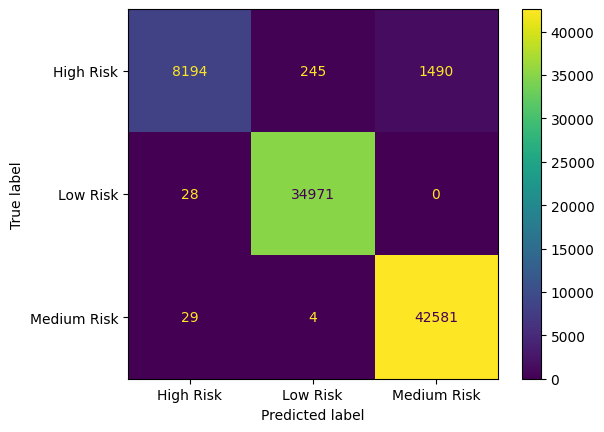

In [83]:
ConfusionMatrixDisplay.from_estimator( best_model, x_test_new, y_test)

# Model Final

In [84]:
#create a new default table to later compare with the default f1 score test values ​​and those already using random seach
all_reports_rf = {}
def performance_report(all_reports_rf, y_train, y_train_predict_rf, y_test, y_test_predict_rf, name):
  score_reports = {
      'train - precision' : precision_score(y_train, y_train_predict_rf,average='micro'),
      'train - recall' : recall_score(y_train, y_train_predict_rf,average='micro'),
      'train - accuracy' : accuracy_score(y_train, y_train_predict_rf),
      'train - f1_score' : f1_score(y_train, y_train_predict_rf,average='micro'),
      'test - precision' : precision_score(y_test, y_test_predict_rf,average='micro'),
      'test - recall' : recall_score(y_test, y_test_predict_rf,average='micro'),
      'test - accuracy_score' : accuracy_score(y_test, y_test_predict_rf),
      'test - f1_score' : f1_score(y_test, y_test_predict_rf,average='micro'),
  }
  all_reports_rf[name] = score_reports
  return all_reports_rf

all_reports_rf = performance_report(all_reports_rf, y_train, y_train_predict_rf, y_test, y_test_predict_rf, 'Baseline (Default Hyperparameter)')
pd.DataFrame(all_reports_rf)

all_reports_rf = performance_report(all_reports_rf, y_train, y_train_predict_best_rf, y_test, y_test_predict_best_rf, 'After HyperParameter Tuning')
pd.DataFrame(all_reports_rf)

,Baseline (Default Hyperparameter),After HyperParameter Tuning
train - precision,0.999986,0.993794
train - recall,0.999986,0.993794
train - accuracy,0.999986,0.993794
train - f1_score,0.999986,0.993794
test - precision,0.979438,0.979484
test - recall,0.979438,0.979484
test - accuracy_score,0.979438,0.979484
test - f1_score,0.979438,0.979484


Based on hyperparamter tuning test on RandomForest Classifier, the best model that we can use is baseline model (default model/before hyperparameter tuning).

# Model Saving

In [85]:
with open('pipeline_preprocessing.pkl', 'wb') as file_1:
  pickle.dump(prep, file_1)

with open('model_rf_best.pkl', 'wb') as file_2:
  pickle.dump(best_model, file_2)

with open('list_num_columns.txt', 'w') as file_3:
  file_3.write(str(correlation_num))

with open('list_cat_columns_ordinal.txt', 'w') as file_4:
  file_4.write(str(correlation_cat_ordinal))

with open('list_cat_columns_non_ordinal.txt', 'w') as file_5:
  file_5.write(str(correlation_cat_non_ordinal))
